Analisi conoscitiva dei dati, valutazione delle varie colonne e degli elementi nulli

In [2393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2394]:
filename = 'train.csv'

In [2395]:
df = pd.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2397]:
# Cabin e Age hanno degli elementi nulli, Embarked anche ma pochi

In [2398]:
# Sostituisco i valori di età mancante con la media percheè sono pochi
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\danie\AppData\Local\Temp\ipykernel_23016\3535165197.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [2399]:
a = df[df['Embarked'].isna() == True]
a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [2400]:
# Elimino la colonna Cabin perchè i valori sono quasi tutti NaN
df.drop(columns=['Cabin'], inplace=True)

In [2401]:
# df.describe()

In [2402]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [2403]:
df_ticket = df['Ticket'].unique()
len(df_ticket)

681

In [2404]:

df_embarked = df['Embarked'].unique()
len(df_embarked), df_embarked

(4, array(['S', 'C', 'Q', nan], dtype=object))

In [2405]:
df_parch = df['Parch'].unique()
len(df_parch), np.sort(df_parch)

(7, array([0, 1, 2, 3, 4, 5, 6], dtype=int64))

In [2406]:
df_sib_sp = df['SibSp'].unique()
len(df_sib_sp),np.sort(df_sib_sp) 

(7, array([0, 1, 2, 3, 4, 5, 8], dtype=int64))

In [2407]:
# df_name = df['PassengerId'].unique()
# len(df_name) -> 891

In [2408]:
# df_name = df['Name'].unique()
# len(df_name) -> 891

In [2409]:
df_male = df[df['Sex'] == 'male']
df_female = df[df['Sex'] == 'female']
'maschi:', len(df_male),'femmine:', len(df_female)

('maschi:', 577, 'femmine:', 314)

In [2410]:
df_survived = df['Survived'].unique()
print('tipi di Survived', df_survived)
df_morti = df[df['Survived'] == 0]
df_vivi = df[df['Survived'] == 1]
'morti:',len(df_morti),'vivi:', len(df_vivi),'somma:', len(df_morti)+ len(df_vivi)

tipi di Survived [0 1]


('morti:', 549, 'vivi:', 342, 'somma:', 891)

In [2411]:
df_morti_f = df[(df['Survived'] == 0) & (df['Sex'] == 'female')]
df_morti_m = df[(df['Survived'] == 0) & (df['Sex'] == 'male')]
df_vivi_f = df[(df['Survived'] == 1) & (df['Sex'] == 'female')]
df_vivi_m = df[(df['Survived'] == 1) & (df['Sex'] == 'male')]
print('morti f:', len(df_morti_f),'Perc:', int(len(df_morti_f)/len(df)*100))
print('morti m:', len(df_morti_m),'Perc:', int(len(df_morti_m)/len(df)*100))
print('vivi f:', len(df_vivi_f),'Perc:', int(len(df_vivi_f)/len(df)*100))
print('vivi m:', len(df_vivi_m),'Perc:', int(len(df_vivi_m)/len(df)*100))

morti f: 81 Perc: 9
morti m: 468 Perc: 52
vivi f: 233 Perc: 26
vivi m: 109 Perc: 12


In [2412]:

df_eta_media = round(df['Age'].mean(), 2)
df_eta_media_morti = round(df_morti['Age'].mean(), 2)
df_eta_media_morti_std = round(df_morti['Age'].std(), 2)
df_eta_media_vivi = round(df_vivi['Age'].mean(), 2)
df_eta_media_vivi_std = round(df_vivi['Age'].std(), 2)
'Età media:',df_eta_media, 'Età media morti:',df_eta_media_morti,df_eta_media_morti_std, 'Età media vivi:',df_eta_media_vivi,df_eta_media_vivi_std

('Età media:',
 29.7,
 'Età media morti:',
 30.42,
 12.46,
 'Età media vivi:',
 28.55,
 13.77)

In [2413]:
df_tk2_age = df.groupby('Ticket')['Age'].mean()
df_tk2_age

Ticket
110152         26.333333
110413         36.333333
110465         38.349559
110564         28.000000
110813         60.000000
                 ...    
W./C. 6608     23.500000
W./C. 6609     29.699118
W.E.P. 5734    46.000000
W/C 14208      30.000000
WE/P 5735      53.000000
Name: Age, Length: 681, dtype: float64

In [2414]:
df_tk2_surv = df_morti.groupby('Ticket')['Survived'].count().sort_values(ascending=False)
df_tk2_surv

Ticket
CA. 2343     7
347082       7
3101295      6
347088       6
CA 2144      6
            ..
315151       1
315097       1
315096       1
315094       1
WE/P 5735    1
Name: Survived, Length: 470, dtype: int64

In [2415]:
df_tk2_surv = df_vivi.groupby('Ticket')['Survived'].count().sort_values(ascending=False)
df_tk2_surv

Ticket
1601         5
2666         4
113760       4
347742       3
17421        3
            ..
2677         1
2687         1
2699         1
27042        1
WE/P 5735    1
Name: Survived, Length: 260, dtype: int64

In [2416]:
df_tk2_surv2 = df_morti.groupby(['Ticket','Embarked'])['Survived'].count().sort_values(ascending=False)
df_tk2_surv2

Ticket     Embarked
CA. 2343   S           7
347082     S           7
3101295    S           6
347088     S           6
CA 2144    S           6
                      ..
315151     S           1
315097     S           1
315096     S           1
315094     S           1
WE/P 5735  S           1
Name: Survived, Length: 470, dtype: int64

In [2417]:
df_pclass_vivi= df_vivi.groupby('Pclass')['Survived'].count().sort_values(ascending=False)
df_pclass_morti= df_morti.groupby('Pclass')['Survived'].count().sort_values(ascending=False)
'vivi:', df_pclass_vivi/len(df_vivi),'morti:', df_pclass_morti/len(df_morti)

('vivi:',
 Pclass
 1    0.397661
 3    0.347953
 2    0.254386
 Name: Survived, dtype: float64,
 'morti:',
 Pclass
 3    0.677596
 2    0.176685
 1    0.145719
 Name: Survived, dtype: float64)

In [2418]:
# df['AgeGroup'] = pd.cut(df, range)

In [2419]:
pclass_survival = df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Pclass:\n", pclass_survival)

sex_survival = df.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Sex:\n", sex_survival)

embarked_survival = df.groupby('Embarked')['Survived'].mean()
print("\nSurvival Rate by Embarked:\n", embarked_survival)

sibsp_survival = df.groupby('SibSp')['Survived'].mean()
print("\nSurvival Rate by SibSp:\n", sibsp_survival)

parch_survival = df.groupby('Parch')['Survived'].mean()
print("\nSurvival Rate by Parch:\n", parch_survival)

Survival Rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Embarked:
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Survival Rate by SibSp:
 SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Survival Rate by Parch:
 Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


In [2420]:
df['AgeGroup'] = pd.cut(df['Age'], bins=range(0, 85, 5), right=False)

age_survival = df.groupby('AgeGroup').agg(
SurvivalRate=('Survived', 'mean'),
Count=('Survived', 'size')
)

print("\nSurvival Rate by Age Group:\n", age_survival)


Survival Rate by Age Group:
           SurvivalRate  Count
AgeGroup                     
[0, 5)        0.675000     40
[5, 10)       0.500000     22
[10, 15)      0.437500     16
[15, 20)      0.395349     86
[20, 25)      0.342105    114
[25, 30)      0.318021    283
[30, 35)      0.421053     95
[35, 40)      0.458333     72
[40, 45)      0.375000     48
[45, 50)      0.390244     41
[50, 55)      0.437500     32
[55, 60)      0.375000     16
[60, 65)      0.400000     15
[65, 70)      0.000000      4
[70, 75)      0.000000      6
[75, 80)           NaN      0


C:\Users\danie\AppData\Local\Temp\ipykernel_23016\979857611.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup').agg(


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

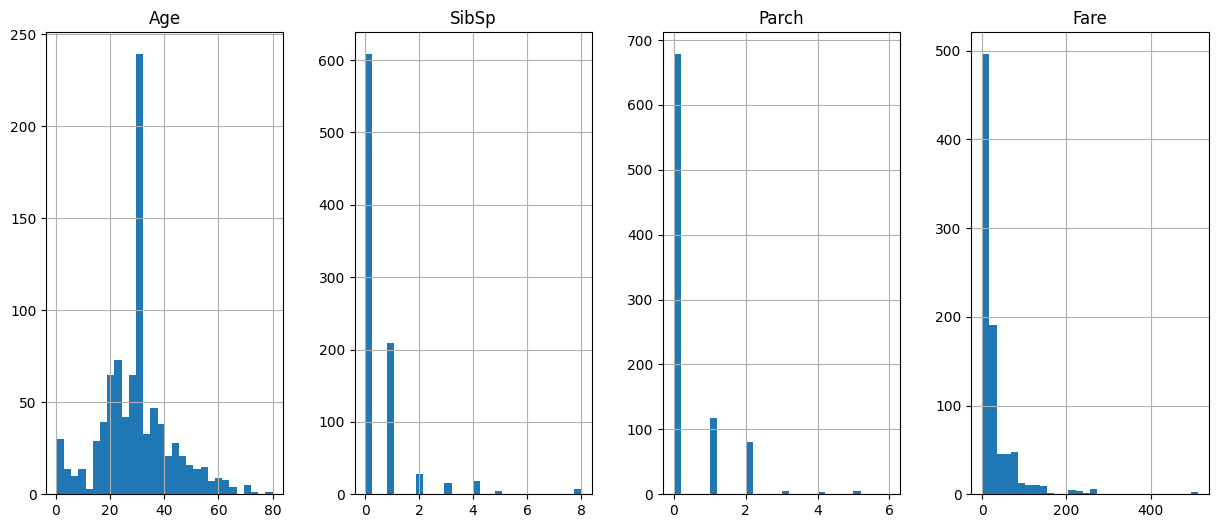

In [2421]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

df[numerical_features].hist(bins=30, figsize=(15, 6), layout=(1, 4))

In [2422]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [2423]:
# max_f = int(np.max(df['Fare']))+1
max_f = 312

In [2424]:
df['FareGroup'] = pd.cut(df['Fare'], bins=range(0, max_f, int(max_f/10)+1), right=False)

fare_survival = df.groupby('FareGroup').agg(
SurvivalRate=('Survived', 'mean'),
Count=('Survived', 'size')
)

print("\nSurvival Rate by Fare Group:\n", fare_survival)


Survival Rate by Fare Group:
             SurvivalRate  Count
FareGroup                      
[0, 32)         0.317647    680
[32, 64)        0.483871     93
[64, 96)        0.646154     65
[96, 128)       0.733333     15
[128, 160)      0.750000     16
[160, 192)      1.000000      2
[192, 224)      0.600000      5
[224, 256)      0.666667      6
[256, 288)      0.666667      6


C:\Users\danie\AppData\Local\Temp\ipykernel_23016\311009852.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('FareGroup').agg(


In [2425]:
pd.get_dummies(df['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [2426]:
df =pd.concat([df, pd.get_dummies(df['Sex'])], axis='columns')
df.drop(columns=['Sex'], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FareGroup,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,"[20, 25)","[0, 32)",False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,"[35, 40)","[64, 96)",True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,"[25, 30)","[0, 32)",True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,"[35, 40)","[32, 64)",True,False
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,"[35, 40)","[0, 32)",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,"[25, 30)","[0, 32)",False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,"[15, 20)","[0, 32)",True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,"[25, 30)","[0, 32)",True,False
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,"[25, 30)","[0, 32)",False,True
